In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder
from titeseq_functions import *
from titeseq_modeling import *
from protein_onehotencoder import ProteinOneHotEncoder

/sw/pkgs/arc/python3.9-anaconda/2021.11/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#get raw data
fit_data_save_location = '/scratch/gthurber_root/gthurber0/marcase/titeseq/'
binary_data = pd.read_csv(fit_data_save_location+'tessier2022_binary.csv')
continuous_data = pd.read_csv(fit_data_save_location+'tessier2022_continuous.csv')
varied_sites = np.array([33,50,55,56,57,99,101,104]) - 1
varied_sites

array([ 32,  49,  54,  55,  56,  98, 100, 103])

In [3]:
binary_data = binary_data.loc[:,binary_data.columns[:-1]]
binary_data['sequence'] = [getCharsFromString(i,varied_sites) for i in binary_data['VH Sequence']]
binary_data

,VH Sequence,ANT Binding,OVA Binding,sequence
0,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,0,1,YRTADVGV
1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,1,1,YKGGSDVY
2,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYFMHWVRQAPGQGLE...,0,1,FKRRSVGA
3,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYSMHWVRQAPGQGLE...,1,1,SKAKGAWD
4,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYFMHWVRQAPGQGLE...,0,1,FRERNAAA
...,...,...,...,...
3995,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYFMHWVRQAPGQGLE...,0,0,FTEEGAVD
3996,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYDMHWVRQAPGQGLE...,0,0,DTTGSDWY
3997,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYVMHWVRQAPGQGLE...,0,0,VEKGGSGD
3998,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,0,0,YKAGDDGA


In [4]:
continuous_data = continuous_data[['VH Sequence','ANT Binding', 'OVA Binding']]
continuous_data['sequence'] = [getCharsFromString(i,varied_sites) for i in continuous_data['VH Sequence']]
continuous_data

,VH Sequence,ANT Binding,OVA Binding,sequence
0,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,0.605333,0.851332,YRAEASGA
1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,1.178590,1.081846,YRAKGSGA
2,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,1.497664,0.813501,YRAGSSSD
3,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,1.407028,0.820071,YRRGDSGD
4,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYSMHWVRQAPGQGLE...,0.915810,0.826149,SKKGGAWV
...,...,...,...,...
121,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,1.020216,0.558968,YKRGSSLF
122,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,1.137895,0.590936,YRAGGSLY
123,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYYMHWVRQAPGQGLE...,1.550090,0.554336,YRGRGAAA
124,QVQLVQSGAEVKKPGASVKVSCKASGYTFTDYFMHWVRQAPGQGLE...,0.368642,0.481901,FRTGDSSS


Text(0, 0.5, 'Binding')

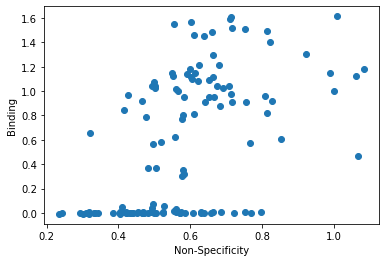

In [5]:
plt.scatter(continuous_data['OVA Binding'],continuous_data['ANT Binding'])
plt.xlabel('Non-Specificity')
plt.ylabel('Binding')

In [6]:
#encode the sequences limited by the binary dataset into one hot encodings and get the corresponding y vectors for both continuous and binary labels
all_amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
amino_acids = list(set(all_amino_acids))
amino_acid_to_index = {aa: i for i, aa in enumerate(amino_acids)}
integer_arrays = [np.array([amino_acid_to_index[aa] for aa in sequence]) for sequence in binary_data['sequence']]
one_hot_encoder = OneHotEncoder(categories="auto")
one_hot_encoded_array = one_hot_encoder.fit_transform(integer_arrays)
one_hot_encoded_array

<4000x50 sparse matrix of type '<class 'numpy.float64'>'
	with 32000 stored elements in Compressed Sparse Row format>

In [7]:
#inverse one hot encode
index_to_amino_acid = {v: k for k, v in amino_acid_to_index.items()}
inverse_transform_AA = one_hot_encoder.inverse_transform(one_hot_encoded_array)
sequence = "".join(amino_acids)

In [8]:
test=[[index_to_amino_acid[i] for i in j] for j in inverse_transform_AA][:5]

In [9]:
["".join(i) for i in test]

['YRTADVGV', 'YKGGSDVY', 'FKRRSVGA', 'SKAKGAWD', 'FRERNAAA']

In [10]:
enc = ProteinOneHotEncoder()

In [11]:
X_tr = enc.fit_transform(binary_data['sequence'])

In [12]:
enc.fit(binary_data['sequence'])
X_tr = enc.transform(binary_data['sequence'])

In [13]:
X_tr

<4000x50 sparse matrix of type '<class 'numpy.float64'>'
	with 32000 stored elements in Compressed Sparse Row format>

In [15]:
enc.inverse_transform(X_tr)[:5]

['YRTADVGV', 'YKGGSDVY', 'FKRRSVGA', 'SKAKGAWD', 'FRERNAAA']